## Import utils

In [1]:
%run utils.py

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy

In [4]:
# parameters for histograms
hist_kw = dict(bins=100, normed=True, alpha=0.5)

# KS investigation

## KS metric pdf generation

###TODO
Build the KS-metric pdf by generating a pair of distributions from `numpy.random.random` many times and using `ks_2samp` function to compute KS 

In [5]:
from scipy.stats import ks_2samp
n1 = 10000
n2 = 20000

# finish the function
def generate_ks_pdf(n1, n2, points=30000):
    ks = []
    # for each point 
    for step in range(points):
        # generate pdf1 and pdf2 from the same distributions
        pdf1 = numpy.random.random(size=n1)
        pdf2 = numpy.random.random(size=n2)
        # compute ks for generated pdfs
        ks.append(ks_2samp(pdf1, pdf2)[0])
    return numpy.array(ks)

In [6]:
ks_pdf = generate_ks_pdf(n1, n2)

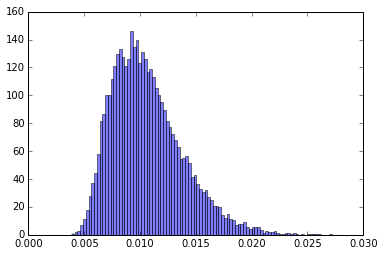

In [7]:
hist(ks_pdf, **hist_kw)
pass

## Assumption:

KS metric pdf will be the same, no matter which distribution we used to generate samples.
To be more precise, samples may be generated from any continuous distribution, not only uniform.

## Check the assumption!


###TODO:
* Generate two samples from a normal distribution and get KS metric pdf in this case. 
* Are two KS metric distributions similar (the first $PDF_{metric,u}$ is received by generating two samples from uniform pdf and the second $PDF_{metric,n}$ is received by generating two samples from normal pdf)?

In [8]:
def generate_ks_pdf_normal(n1, n2, points=30000):
    ks = []
    # for each point 
    for step in range(points):
        # generate pdf1 and pdf2 from the same distributions
        pdf1 = numpy.random.normal(size=n1, loc=10, scale=5)
        pdf2 = numpy.random.normal(size=n2, loc=10, scale=5)
        # compute ks for generated pdfs
        ks.append(ks_2samp(pdf1, pdf2)[0])
    return numpy.array(ks)

In [9]:
ks_pdf_normal = generate_ks_pdf_normal(n1, n2)

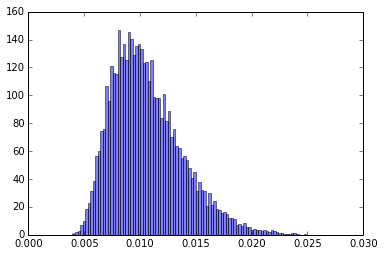

In [10]:
hist(ks_pdf_normal, **hist_kw)
pass

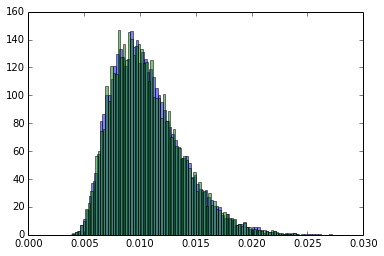

In [11]:
hist(ks_pdf, **hist_kw)
hist(ks_pdf_normal, **hist_kw)
pass

## Do you check these two KS metric distributions by eye? 

To check if $PDF_{metric,u}$ and $PDF_{metric,n}$ are similar compute KS metric between them!

In [12]:
ks_2samp(ks_pdf, ks_pdf_normal)[0]

0.005933333333333346


## How can one understand what this metric value means?

two options here

### 1. KS test:

This is Kolmogorov-Smirnov statistic to test a hypothesis that two samples come from the same distibution.

Statistic:

$q= \sqrt{\frac{n*m}{n + m}}KS_{nm}$

$K_{\alpha} \sim \sqrt{-0.5 * \ln{\frac{1 - \alpha}{2}}}$, 

where $\alpha$ - statistical significance, $KS_{nm}$ - Kolmogorov-Smirnov metric.

If $q > K_{\alpha}$ then hypothesis (that both samples from the same distribution) will be rejected.

### 2. P-value calculated using the KS metric pdf:

You can calculate p-value using generated KS pdf to test the hypotheses

### TODO:
Check that $PDF_{metric,u}$ and $PDF_{metric,n}$ come from the same distribution (It will mean that our assumption holds).

Use the p-value returned by `ks_2samp` to understand KS-metric value between $PDF_{metric,u}$ and $PDF_{metric,n}$ 

In [13]:
ks_2samp(ks_pdf, ks_pdf_normal)

(0.005933333333333346, 0.6652714125281175)

if p-value is not small we can't reject hypothesis (so consider them coming from the same distribution)

## Сan you now answer if the KS metric pdf depends on the initial continuous distribution, from which two samples are generated? Can you prove this behaviour?

If you remember how the KS metric is calculated using the roc curve you will understand that the KS metric use only the permutation of the sample1 in the sample2, $ks=\max{|fpr - tpr|}$. Thus, the initial disribution will be transformed into a zeros-ones sequence, where zero means an element came from the sample1 and one - the sample2. If the samples were generated from the same distibution then probability of such zeros-ones sequence will be $\frac{(n1 + n2)!}{n1!n2!}$ and it doesn't depend on the initial distribution. Thus, the initial distribution doesn't matter and we can generate the KS pdf using the uniform distribution.

###TODO:

Above you checked the similarity of $PDF_{metric,u}$ and $PDF_{metric,n}$ using KS statistic. 

Now try option 2 to check this: generate KS metric distribution $PDF_{KS}$ for samples $PDF_{metric,u}$ and $PDF_{metric,n}$ and compute p-value of their distance using $PDF_{KS}.$

In [14]:
test_ks_pdf = generate_ks_pdf(len(ks_pdf), len(ks_pdf_normal))

In [15]:
# compute p-value using the KS pdf 
numpy.mean(test_ks_pdf > ks_2samp(ks_pdf, ks_pdf_normal)[0])

0.65823333333333334

**Note:** two p-values, obtained by two methods (KS statistic, KS metric distibution) are very similar.

## Example 

Two similar normal distributions are generated. By eye they are very similar, but the KS test says that hypothesis (the same distribution) should be rejected.

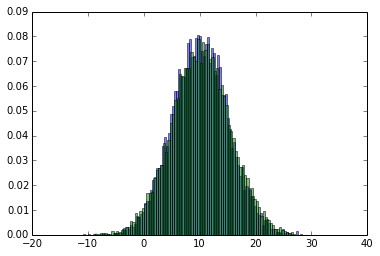

In [16]:
pdf1_g = numpy.random.normal(loc=10, scale=5, size=n1)
pdf2_g = numpy.random.normal(loc=10.2, scale=5.3, size=n2)
hist(pdf1_g, **hist_kw)
hist(pdf2_g, **hist_kw)
pass

In [17]:
ks_2samp(pdf1_g, pdf2_g)

(0.02354999999999996, 0.0012022637173668765)

In [18]:
numpy.mean(ks_pdf > ks_2samp(pdf1_g, pdf2_g)[0])

0.0013666666666666666

p-value < 0.005, thus the KS test says that samples were generated from different distributions. 

# CvM investigation

The mass and several predictions are generated to see the CvM metric:

* mass from 1000 * exp(1), range=(0, 4000);
* prediction_sin = sin(mass / 1000.)
* prediction_rand = numpy.random.random
* prediction_cut = zeros outside [1000, 1500] mass region and ones in this region

In [19]:
mass = 1000 * numpy.random.exponential(1, size=10000)
mass = mass[mass < 4000]
prediction_cut = numpy.zeros(len(mass))
prediction_cut[(mass > 1000) & (mass < 1500)] = 1
prediction_rand = numpy.random.random(len(mass))
prediction_sin = numpy.sin(mass / 1000.)

## Plot:
* mass histogram
* mass histogram for each prediction selection > 0.5

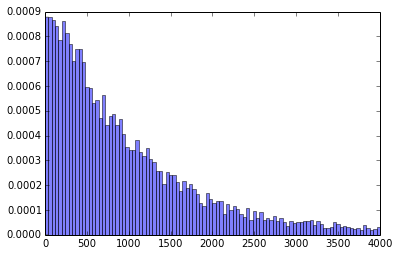

In [20]:
hist(mass, **hist_kw)
pass

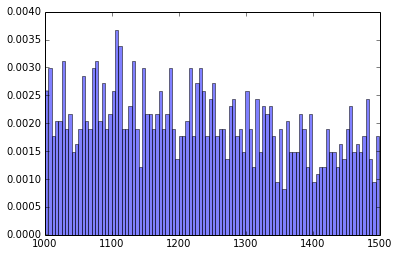

In [21]:
hist(mass[prediction_cut > 0.5], **hist_kw)
pass

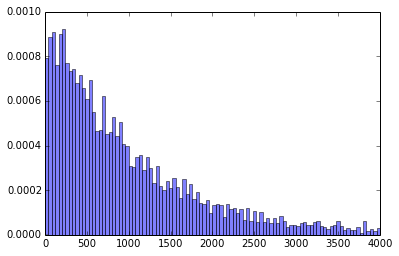

In [22]:
hist(mass[prediction_rand > 0.5], **hist_kw)
pass

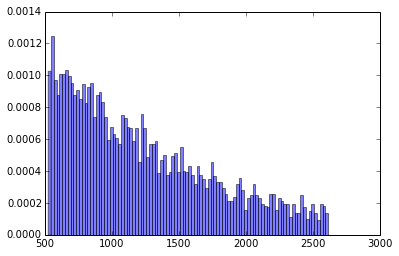

In [23]:
hist(mass[prediction_sin > 0.5], **hist_kw)
pass

### For which prediction does selection change initial pdf? Check your thoughts using CvM metric.

#### What predictions always must be uncorrelated with the mass? 

CvM metric can be calculated using:

* `from utils import compute_cvm`
* `compute_cvm(predictions, mass)`

For CvM metric we haven't statistic like KS statistic to test hypothesis, that is why only pdf generation can help.

In [24]:
from utils import compute_cvm
import pandas
cvms = [compute_cvm(prediction_rand, mass), compute_cvm(prediction_sin, mass), compute_cvm(prediction_cut, mass)]
df = pandas.DataFrame({'name': ['random', 'sin', 'cut'], 'cvm': cvms}) 
df

,cvm,name
0,0.000899,random
1,0.157148,sin
2,0.149550,cut


Generate CvM metric distribution using appropriate distribution for predicitons generation.

**Random predictions always are uncorellated with the mass**

In [25]:
def generate_cvm_pdf(mass, points=5000):
    cvm = []
    # for each point 
    for step in range(points):
        # generate uncorellated predictions for mass
        probs = numpy.random.random(size=len(mass))
        # compute cvm for generated prediction and mass
        cvm.append(compute_cvm(probs, mass))
    return numpy.array(cvm)

In [26]:
cvm_pdf = generate_cvm_pdf(mass)

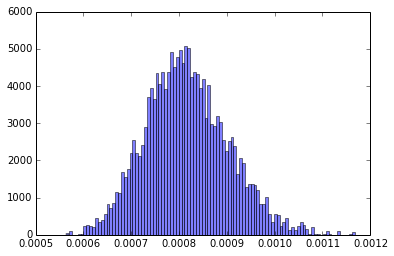

In [27]:
hist(cvm_pdf, **hist_kw)
pass

Compute p-value to check correlation

In [28]:
for _, row in df.iterrows():
    print row['name'], numpy.mean(cvm_pdf > row['cvm'])

random 0.1714
sin 0.0
cut 0.0


# Classifiers training:
## check influence of the correlation restriction on the quality

Download 

* `training.csv`, 
* `check_correlation.csv`, 

to the folder `datasets/` from https://www.kaggle.com/c/flavours-of-physics/data

In [29]:
data = pandas.read_csv('datasets/training.csv')
data_correlation = pandas.read_csv('datasets/check_correlation.csv')

In [30]:
data.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [31]:
data_correlation.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,mass
0,11120335,0.000703,0.999715,2.927074,0.214014,0.081302,4.259793,1.066585,3108.189941,0.010767,...,1294.450928,1073.976440,9274.671875,7963.914062,6712.897949,2.783731,2.503310,2.519349,280,1723.887939
1,11495369,0.000601,0.999950,15.849142,0.842973,0.182213,13.882857,5.780046,6858.264648,0.007574,...,3981.284912,1859.680542,22844.791016,109955.101562,37051.800781,3.660059,4.011287,3.684429,386,1926.284058
2,7098902,0.002009,0.999984,43.358494,1.323199,0.200158,12.870687,3.460782,3604.347412,0.052849,...,2564.430420,354.095032,45214.070312,77265.429688,12087.007812,4.458619,4.098382,4.223254,433,1830.873047
3,8103692,0.001268,0.999550,6.910733,0.198652,0.167730,8.559438,7.676139,3240.960449,0.101368,...,1178.332031,1285.701660,11245.551758,6770.969238,17003.119141,3.060873,2.434033,3.273807,245,1909.119019
4,10160864,0.001937,0.999996,36.135208,0.508036,0.097170,9.295684,0.426340,6448.445312,0.007005,...,3140.512207,385.343475,48171.457031,43973.835938,7368.522949,3.441606,3.331079,3.643300,489,1600.925049


In [32]:
train_features = list(set(data_correlation.columns) - {'id'})
train_features_wo_mass = list(set(data_correlation.columns) - {'id', 'mass'})

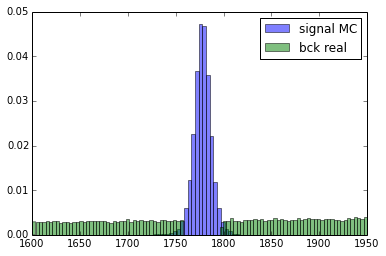

In [33]:
hist(data[data.signal == 1]['mass'].values, label='signal MC', **hist_kw)
hist(data[data.signal == 0]['mass'].values, label='bck real', **hist_kw)
xlim(1600, 1950)
legend()

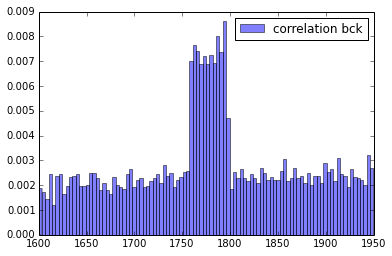

In [34]:
hist(data_correlation['mass'].values, label='correlation bck', **hist_kw)
legend()

### TODO:

* Train any linear model and ensemble model on `train_features`.
* Are models are correlated with the mass?
* Compute the AUC for the models
* Are they have essential difference?
* Use feature `(mass - mass.mean())**2` instead of `mass`. How does it infuence on the models?

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [36]:
# Divide train on train, test
train_index, test_index = train_test_split(range(len(data)))
train = data.iloc[train_index, :]
test = data.iloc[test_index, :]

In [37]:
# generate cvm pdf
tau_cvm = generate_cvm_pdf(data_correlation.mass.values)

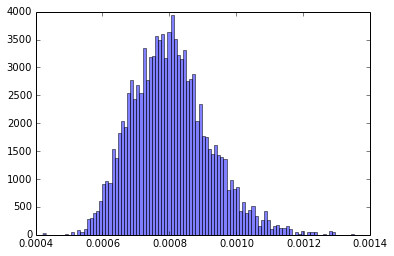

In [38]:
hist(tau_cvm, **hist_kw)
pass

In [39]:
# define function to test model on cvm and calculate quality
def test_model(model, features, cvm_pdf):
    model_cvm = model.predict_proba(data_correlation[features])[:, 1]
    model_corr = compute_cvm(data_correlation.mass.values, model_cvm)
    print 'Correlation', model_corr, 'p-value', numpy.mean(cvm_pdf > model_corr)
    print 'AUC', roc_auc_score(test.signal.values, model.predict_proba(test[features])[:, 1])

In [40]:
# train gradient boosting
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, min_samples_leaf=50, subsample=0.7, 
                                max_features=20)
gb.fit(train[train_features], train['signal'].values)
test_model(gb, train_features, tau_cvm)

Correlation 0.0245145228163 p-value 0.0
AUC 0.999453830199


In [41]:
# train logistic regression
lr = LogisticRegression(max_iter=200)
lr.fit(train[train_features], train['signal'].values)
test_model(lr, train_features, tau_cvm)

Correlation 0.00144782522651 p-value 0.0
AUC 0.907718497107


#### Add new feature for linear model

In [42]:
train['mean'] = (train.mass.values - train.mass.mean())**2
test['mean'] = (test.mass.values - train.mass.mean())**2
data_correlation['mean'] = (data_correlation.mass.values - train.mass.mean())**2

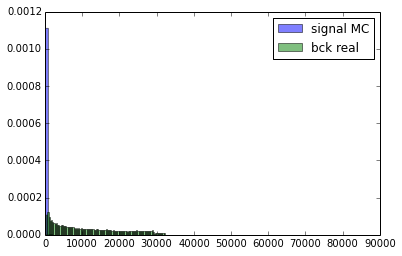

In [43]:
hist(train[train.signal == 1]['mean'].values, label='signal MC', **hist_kw)
hist(train[train.signal == 0]['mean'].values, label='bck real', **hist_kw)
# xlim(1600, 1950)
legend()

In [44]:
# train gradient boosting
gb_new = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, min_samples_leaf=50, subsample=0.7, 
                                max_features=20)
gb_new.fit(train[train_features + ['mean']], train['signal'].values)
test_model(gb_new, train_features + ['mean'], tau_cvm)

Correlation 0.0258092170223 p-value 0.0
AUC 0.999474475462


In [45]:
# train gradient logistic regression
lr_new = LogisticRegression(max_iter=200)
lr_new.fit(train[train_features_wo_mass + ['mean']], train['signal'].values)
test_model(lr_new, train_features_wo_mass + ['mean'], tau_cvm)

Correlation 0.0369520169248 p-value 0.0
AUC 0.995769143381


We can see that new feature a bit helps to boosting and strongly helps to linear model (because for new feature linear model can distinguish signal and bck)

### How does shape of the mass in correlation dataset change depending on models' thresholds?

In [46]:
def compare_shape(model, features):
    probs = model.predict_proba(data_correlation[features])[:, 1]
    hist_kw['bins'] = 30
    for thr in [0.001, 0.05, 0.1, 0.5]:
        hist(data_correlation[probs > thr]['mass'].values, label='thr=%1.2f' %thr, **hist_kw)
    legend()

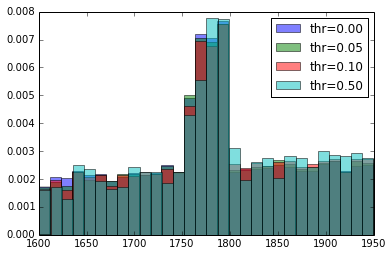

In [47]:
compare_shape(lr, train_features)

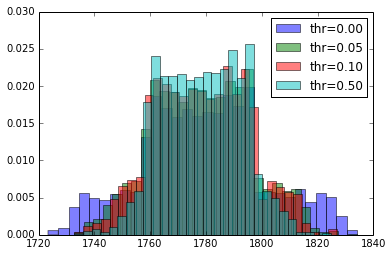

In [48]:
compare_shape(lr_new, train_features_wo_mass + ['mean'])

It is seen that shape changes, but for linear model trained on mass (where cvm is too lower) the shape changes not strongly. Thus the second classifier is strongly correlated with the mass.

## How the feature bagging and events bagging affect the CvM and quality?

In [49]:
# train gradient boosting
for max_features in [20, 15, 10, 5]:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, min_samples_leaf=50, subsample=0.7, 
                                    max_features=max_features)
    gb.fit(train[train_features], train['signal'].values)
    test_model(gb, train_features, tau_cvm)

Correlation 0.0221550725931 p-value 0.0
AUC 0.999126009796
Correlation 0.0205159341035 p-value 0.0
AUC 0.999011531183
Correlation 0.0144323248061 p-value 0.0
AUC 0.997830536215
Correlation 0.0098546583012 p-value 0.0
AUC 0.994213133546


In [50]:
# train gradient boosting
for subsample in [0.2, 0.5, 0.9]:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, min_samples_leaf=50, subsample=subsample, 
                                    max_features=10)
    gb.fit(train[train_features], train['signal'].values)
    test_model(gb, train_features, tau_cvm)

Correlation 0.0165865895772 p-value 0.0
AUC 0.998218507151
Correlation 0.0163680351747 p-value 0.0
AUC 0.998198061896
Correlation 0.0182433733466 p-value 0.0
AUC 0.998525423023


CvM and quality are both lower if max_feature/subsample becomes lower, but it is not sufficient to remove correlation. It will be useful, when you use feature (which is not strongly correlated with the mass) for training to prevent correlation.

## Produce new feature from mass to use it in training and make cvm much lower.

In [51]:
train['new_mass'] = sin(train.mass.values / 10)
test['new_mass'] = sin(test.mass.values / 10)
data_correlation['new_mass'] = sin(data_correlation.mass.values / 10)

In [52]:
# train gradient boosting
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, min_samples_leaf=50, subsample=0.7, 
                                max_features=20)
gb.fit(train[train_features_wo_mass + ['new_mass']], train['signal'].values)
test_model(gb, train_features_wo_mass + ['new_mass'], tau_cvm)

Correlation 0.00183404902107 p-value 0.0
AUC 0.967246471875


In the competition cvm 0.002 threshold is set. Now this model will pass this test, although it still looks like correlated (note that this threshold was set on much bigger dataset, so our cvm pdf differs from the original) 

### Answer the question: 
* What quality can you get if `mass` is not used in the training? Is it different? Then why? 
* What model is better, linear or ensemble? Compare their cvm.

In [53]:
# train gradient boosting
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, min_samples_leaf=50, subsample=0.7, 
                                max_features=20)
gb.fit(train[train_features_wo_mass], train['signal'].values)
test_model(gb, train_features_wo_mass, tau_cvm)

Correlation 0.000996918609979 p-value 0.0572
AUC 0.95078292289


In [54]:
# train gradient logistic regression
lr = LogisticRegression(max_iter=200)
lr.fit(train[train_features_wo_mass], train['signal'].values)
test_model(lr, train_features_wo_mass, tau_cvm)

Correlation 0.000862308681361 p-value 0.2782
AUC 0.912749874351


## Example

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(train[train_features_wo_mass], train['signal'].values)
test_model(rf, train_features_wo_mass, tau_cvm)

Correlation 0.00371547496313 p-value 0.0
AUC 0.877095779382


## Explain why this model is correlated with the mass, although mass feature is absent in training sample?

In [57]:
print 'AUC on train', roc_auc_score(train.signal.values, rf.predict_proba(train[train_features_wo_mass])[:, 1])

AUC on train 0.98926133041


In [58]:
probs = rf.predict_proba(test[train_features_wo_mass])[:, 1]

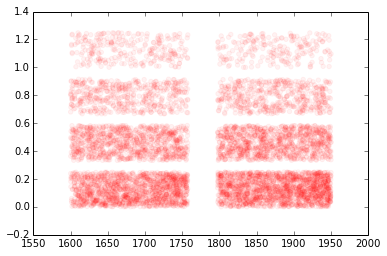

In [79]:
shift = numpy.random.random(size=sum(test.signal == 0))
scatter(test[test.signal == 0]['mass'].values, probs[test.signal.values == 0] + shift * 0.25, alpha=0.05, color='r')

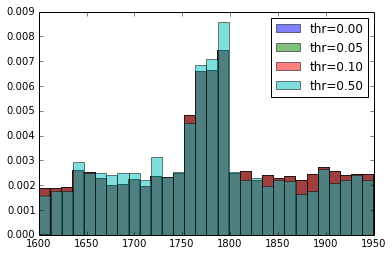

In [60]:
compare_shape(rf, train_features_wo_mass)

You always have somehow correlated with the mass features. Tree can see reconstruct or not these dependencies. Features bagging, limited depth (for weak models) can help get uncorrelated model with well quality. But combinations of best models (like unlimited depth) can reconstruct mass and will be correlated with the mass, as in this example (also here we can notice overfitting-difference of our model)

## Overfitting possibilities:
* overfitting-difference (difference between prediction's pdf for training and test datasets) - check by comparing distributions
* overfitting-complexity (overfitting because too many estimators used in training)

### Overfitting-difference

In [61]:
probs_train = rf.predict_proba(train[train_features_wo_mass])[:, 1]

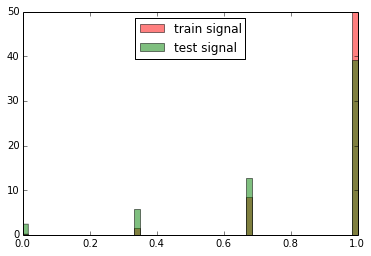

In [62]:
hist_kw['bins'] = 60
hist_kw['alpha'] = 0.5
hist_kw['range'] = (0, 1)
hist(probs_train[train.signal.values == 1], color='r', label='train signal', **hist_kw)
hist(probs[test.signal.values == 1], color='g', label='test signal', **hist_kw)
legend(loc='upper center')

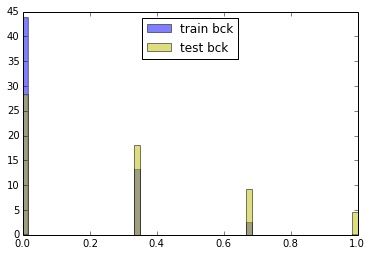

In [63]:
hist(probs_train[train.signal.values == 0], color='b', label='train bck', **hist_kw)
hist(probs[test.signal.values == 0], color='y', label='test bck', **hist_kw)
legend(loc='upper center')

Thus tree structure influences the correlation!

## Feature bagging invention

Write your own feature bagging algorithm: features will be chosen with some probability.

Compare using knn-method:

* standard feature bagging and this one

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSampler(BaseEstimator, TransformerMixin):
    def fit(self, X, y, sample_weight=None):
        # finish method: generate features proportionally their information 
        # compute information using roc auc score 
        aucs = []
        self.n_features = X.shape[1]
        self.max_features = numpy.random.randint(2, high=8)
        
        for feature in range(self.n_features):
            auc = roc_auc_score(y, X[:, feature])
            auc = abs(auc - 0.5)
            aucs.append(auc)
        self.features_information = numpy.array(aucs)
        self.features_information /= sum(self.features_information)
        self.used_features = numpy.random.choice(range(self.n_features), size=self.max_features, replace=False,
                                                 p=self.features_information)
        return self
    
    def transform(self, X):
        # finish method returning necessary features         
        return X[:, self.used_features]

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
simple_knn = KNeighborsClassifier(n_neighbors=50)
pp_sampler = Pipeline([('sampler', FeatureSampler()), ('knn', simple_knn)])

### train simple knn

In [67]:
simple_knn.fit(train[train_features_wo_mass], train['signal'].values)
test_model(simple_knn, train_features_wo_mass, tau_cvm)

Correlation 0.00118541558289 p-value 0.0034
AUC 0.613616896871


### train knn with standard bagging

In [68]:
bg = BaggingClassifier(base_estimator=simple_knn, n_estimators=50, max_samples=0.5, max_features=0.1)
bg.fit(train[train_features_wo_mass], train['signal'].values)
test_model(bg, train_features_wo_mass, tau_cvm)

Correlation 0.00079337894929 p-value 0.5088
AUC 0.903703441636


### own feature bagging 

In [69]:
bg = BaggingClassifier(base_estimator=pp_sampler, n_estimators=50, max_samples=0.5)
bg.fit(train[train_features_wo_mass], train['signal'].values)
test_model(bg, train_features_wo_mass, tau_cvm)

Correlation 0.000993722687675 p-value 0.0606
AUC 0.907809819246


Thus, bagging improve knn algorithm and another feature bagging also gives improvement

### Can some scaler help to improve knn quality?
As an example, there is `sklearn.preprocessing.StandardScaler`

In [70]:
pp_sampler = Pipeline([('scaler', StandardScaler()), ('sampler', FeatureSampler()), ('knn', simple_knn)])
pp = Pipeline([('scaler', StandardScaler()), ('knn', simple_knn)])

In [71]:
pp.fit(train[train_features_wo_mass], train['signal'].values)
test_model(pp, train_features_wo_mass, tau_cvm)

Correlation 0.000905025118527 p-value 0.1786
AUC 0.929466566704


In [72]:
bg = BaggingClassifier(base_estimator=pp, n_estimators=50, max_samples=0.5, max_features=0.1)
bg.fit(train[train_features_wo_mass], train['signal'].values)
test_model(bg, train_features_wo_mass, tau_cvm)

Correlation 0.00097794662584 p-value 0.0748
AUC 0.894055133208


In [73]:
bg = BaggingClassifier(base_estimator=pp_sampler, n_estimators=50, max_samples=0.5)
bg.fit(train[train_features_wo_mass], train['signal'].values)
test_model(bg, train_features_wo_mass, tau_cvm)

Correlation 0.0011780927918 p-value 0.0038
AUC 0.910721393933


### Algorithm quality depends on the data preprocessing, which should be different for various models

## Summarize:

* Now you can understand the trade off between the corelation and quality
* You can invent new algorithms which will be trained on the mass column and will be not correlated with the mass